In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/anthonymoubarak/Desktop/Data_Viz/2023-anly503-am4315/Project/ufo_data_nuforc.csv")

# convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y', errors='coerce')
df['year'] = df['date'].dt.strftime('%Y')
df = df.sort_values(by=['date'], ascending=True)

df = df.sort_values(by=['date'] , ascending = True)

df

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_30139/335015039.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/anthonymoubarak/Desktop/Data_Viz/2023-anly503-am4315/Project/ufo_data_nuforc.csv")


,posted,date,time,city,state,shape,duration,summary,images,year
113584,12/16/99,1973-01-01,23:30:00,Chattanooga,TN,Oval,30 sec.,3 objects in a tri-angle formation also in sta...,NaN,1973
90658,03/11/06,1973-01-08,21:00:00,Muscle Shoals,AL,Oval,20 seconds,Glowing orange detailess object with outline s...,NaN,1973
104522,11/20/02,1973-01-12,03:00:00,"Farmington (SE of, deserted area, Hwy 44)",NM,Light,aprox:2-3 min,A large bright light apeared seemingly from no...,NaN,1973
82505,02/14/08,1973-01-14,19:00:00,Scranton,PA,Rectangle,10 seconds,Rectangular object moving at a very high rate ...,NaN,1973
113583,12/16/99,1973-01-28,23:38:00,Glendora,CA,Disk,5-10 mins,An illuminated Saucer hovers over my back pati...,NaN,1973
...,...,...,...,...,...,...,...,...,...,...
106609,06/12/02,2023-01-11,21:00:00,Pasadena,CA,Circle,20 seconds,THESE OBJECTS SEEM TO MAKE OBVIOUS ATTEMPTS AT...,NaN,2023
11791,06/25/20,2023-01-11,21:00:00,New London,WI,Light,2-3 minutes,It was a disembodied blinking light. At first ...,NaN,2023
11790,06/25/20,2023-01-11,23:00:00,Manning,SC,Sphere,2 minutes,The object was metallic in color. Spherical in...,NaN,2023
13944,01/31/20,2023-01-11,17:00:00,Philadelphia,PA,Circle,10 minutes,Sighting of 4 circular lights that were in for...,NaN,2023


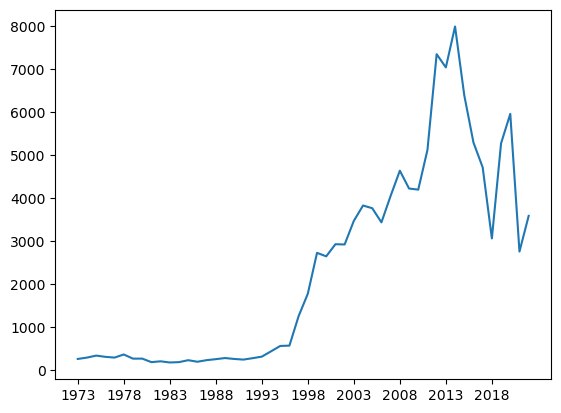

In [3]:
# Filter data to number of sightings per year
df_grouped = df.groupby(df['year']).size().reset_index(name='count')
df_grouped['year'] = df_grouped['year'].astype('int')
df_grouped = df_grouped[df_grouped['year'] != 2023]

# Set the x-axis intervals to 10 years
years = range(df_grouped['year'].min(), df_grouped['year'].max()+1, 5)
plt.xticks(years)

plt.plot(df_grouped['year'], df_grouped['count'])


In [4]:
# Group sightings by state and year 
#Exclude 2023 
ufo_state_year = df.groupby(['year', 'state']).count().reset_index()
ufo_state_year = ufo_state_year[['year', 'state', 'posted']].rename(columns={'posted': 'count'})
ufo_state_year = ufo_state_year[ufo_state_year['year'] != '2023']


In [5]:
import plotly.graph_objs as go
import pandas as pd

data = {'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
        'count': [10, 20, 30, 40, 50],
        'lat': [32.8067, 61.3850, 33.7298, 34.9697, 36.7783],
        'lon': [-86.7911, -152.2683, -111.4312, -92.3731, -119.4179]}
df = pd.DataFrame(data)



In [6]:
# Center (lat,long) of every US state, which will be used to plot the UFOs

state_centers = {
    'AK': [63.588753, -154.493062],
    'AL': [32.318230, -86.902298],
    'AR': [35.201050, -91.831833],
    'AZ': [34.048927, -111.093735],
    'CA': [36.778261, -119.417932],
    'CO': [39.550051, -105.782067],
    'CT': [41.603221, -73.087749],
    'DC': [38.905985, -77.033418],
    'DE': [38.910832, -75.527670],
    'FL': [27.994402, -81.760254],
    'GA': [33.247875, -83.441162],
    'HI': [19.741755, -155.844437],
    'IA': [41.878003, -93.097702],
    'ID': [44.068202, -114.742041],
    'IL': [40.633125, -89.398529],
    'IN': [40.551217, -85.602364],
    'KS': [39.011902, -98.484246],
    'KY': [37.839333, -84.270020],
    'LA': [31.244823, -92.145024],
    'MA': [42.407211, -71.382437],
    'MD': [39.045753, -76.641273],
    'ME': [45.253783, -69.445469],
    'MI': [44.314844, -85.602364],
    'MN': [46.729553, -94.685900],
    'MO': [37.964253, -91.831833],
    'MS': [32.354668, -89.398529],
    'MT': [46.879682, -110.362566],
    'NC': [35.759573, -79.019300],
    'ND': [47.551493, -101.002012],
    'NE': [41.492537, -99.901810],
    'NH': [43.193852, -71.572395],
    'NJ': [40.058324, -74.405661],
    'NM': [34.972730, -105.032363],
    'NV': [38.802610, -116.419389],
    'NY': [43.299428, -74.217933],
    'OH': [40.417287, -82.907123],
    'OK': [35.007752, -97.092877],
    'OR': [43.804133, -120.554201],
    'PA': [41.203323, -77.194527],
    'PR': [18.2208, 66.5901],
    'RI': [41.580095, -71.477429],
    'SC': [33.836081, -81.163725],
    'SD': [43.969515, -99.901810],
    'TN': [35.517491, -86.580447],
    'TX': [31.968599, -99.901810],
    'UT': [39.320980, -111.093731],
    'VA': [37.431573, -78.656894],
    'VI': [17.7460  , 64.7445],
    'VT': [44.558803, -72.577841],
    'WA': [47.751076, -120.740135],
    'WI': [44.268543, -89.616508],
    'WV': [38.597626, -80.454903],
    'WY': [43.075968, -107.290284]}
    


In [7]:
ufo_state_year['long'] = ''
ufo_state_year['lat'] = ''


# Loop over the state column and assign X and Y values
for index, row in ufo_state_year.iterrows():
    state_code = row['state']
    x, y = state_centers[state_code]
    ufo_state_year.at[index, 'long'] = y
    ufo_state_year.at[index, 'lat'] = x
ufo_state_year

,year,state,count,long,lat
0,1973,AK,1,-154.493062,63.588753
1,1973,AL,14,-86.902298,32.31823
2,1973,AR,6,-91.831833,35.20105
3,1973,AZ,3,-111.093735,34.048927
4,1973,CA,16,-119.417932,36.778261
...,...,...,...,...,...
2429,2022,VT,21,-72.577841,44.558803
2430,2022,WA,143,-120.740135,47.751076
2431,2022,WI,70,-89.616508,44.268543
2432,2022,WV,23,-80.454903,38.597626


In [8]:
# Normalize the count column 

ufo_state_year['count_normalized'] = (ufo_state_year['count'] - ufo_state_year['count'].min()) / (ufo_state_year['count'].max() - ufo_state_year['count'].min())


# GIF Plot

## Testing notebooks

In [9]:
# Filter to year 1975

ufo_state_year_1975 = ufo_state_year[ufo_state_year['year'] == '1975']
ufo_state_year_1975 = ufo_state_year_1975.drop(ufo_state_year_1975[ufo_state_year_1975['count_normalized'] == 0].index)
ufo_state_year_1975
# set scale
scale = 1000

# create figure
fig = go.Figure(
    go.Scattergeo(
        lon = ufo_state_year_1975['long'],
        lat = ufo_state_year_1975['lat'],
        mode = 'text',
        text = '🛸',
        textfont_size = scale*(ufo_state_year_1975['count_normalized'])
    )
)

fig.add_annotation(
    x= 1,y=0.3,
    xref = 'paper',
    yref='paper',
    text="1975",
    showarrow=False,
    font=dict(size=27, color='black'),
)

# Start of legend
fig.add_annotation(
    x=1.2,y=0.85,
    xref = 'paper',
    yref='paper',
    text="Number of UFO sighted",
    showarrow=False,
    font=dict(size=17, color='black'),
)

# Legend entry 1
fig.add_annotation(
    x=1.14,y=0.786,
    xref = 'paper',
    yref='paper',
    text="🛸",
    showarrow=False,
    font=dict(size=27, color='black'),
)
fig.add_annotation(
    x=1.05,y=0.77,
    xref = 'paper',
    yref='paper',
    text="5",
    showarrow=False,
    font=dict(size=13, color='black'),
)

# Legend entry 2
fig.add_annotation(
    x=1.16,y=0.72,
    xref = 'paper',
    yref='paper',
    text="🛸",
    showarrow=False,
    font=dict(size=50, color='black'),
)
fig.add_annotation(
    x=1.05,y=0.67,
    xref = 'paper',
    yref='paper',
    text="75",
    showarrow=False,
    font=dict(size=13, color='black'),
)

# Legend entry 3
fig.add_annotation(
    x=1.17,y=0.55,
    xref = 'paper',
    yref='paper',
    text="🛸",
    showarrow=False,
    font=dict(size=65, color='black'),
)
fig.add_annotation(
    x=1.05,y=0.55,
    xref = 'paper',
    yref='paper',
    text="125",
    showarrow=False,
    font=dict(size=13, color='black'),
)



fig.update_geos(landcolor='#D8D8D8')


fig.update_layout(
    title = 'Number of UFO Sightings in the US across the years',
    geo_scope='usa',
    width=1000,
    height=550,
    margin={"r":180,"t":30,"l":0,"b":0},
    plot_bgcolor='#B5D6E3',  # set background color outside of the map
    paper_bgcolor='#B5D6E3',
    geo=dict(bgcolor='#B5D6E3' , showsubunits=True, subunitcolor='black')  # set background color of the map
)

fig.write_image("x.png")
fig.show()


In [10]:
# Filter to year 1985

ufo_state_year_1985 = ufo_state_year[ufo_state_year['year'] == '1985']
ufo_state_year_1985 = ufo_state_year_1985.drop(ufo_state_year_1985[ufo_state_year_1985['count_normalized'] == 0].index)
ufo_state_year_1985
# set scale
scale = 1000

# create figure
fig = go.Figure(
    go.Scattergeo(
        lon = ufo_state_year_1985['long'],
        lat = ufo_state_year_1985['lat'],
        mode = 'text',
        text = '🛸',
        textfont_size = scale*(ufo_state_year_1985['count_normalized'])
    )
)

fig.update_geos(landcolor='#D8D8D8')

fig.add_annotation(
    x=0.9,y=0.3,
    xref = 'paper',
    yref='paper',
    text="1985",
    showarrow=False,
    font=dict(size=27, color='black'),
)



fig.update_layout(
    title = 'UFO Sightings',
    geo_scope='usa',
    width=1000,
    height=550,
    margin={"r":0,"t":0,"l":0,"b":0},
    plot_bgcolor='#B5D6E3',  # set background color outside of the map
    geo=dict(bgcolor='#B5D6E3' , showsubunits=True, subunitcolor='black')  # set background color of the map
)

fig.show()


In [11]:
# Filter to year 1995

ufo_state_year_1995 = ufo_state_year[ufo_state_year['year'] == '1995']
ufo_state_year_1995 = ufo_state_year_1995.drop(ufo_state_year_1995[ufo_state_year_1995['count_normalized'] == 0].index)
ufo_state_year_1995
# set scale
scale = 1000

# create figure
fig = go.Figure(
    go.Scattergeo(
        lon = ufo_state_year_1995['long'],
        lat = ufo_state_year_1995['lat'],
        mode = 'text',
        text = '🛸',
        textfont_size = scale*(ufo_state_year_1995['count_normalized'])
    )
)

fig.update_geos(landcolor='#D8D8D8')

fig.add_annotation(
    x=0.9,y=0.3,
    xref = 'paper',
    yref='paper',
    text="1995",
    showarrow=False,
    font=dict(size=27, color='black'),
)



fig.update_layout(
    title = 'UFO Sightings',
    geo_scope='usa',
    width=1000,
    height=550,
    margin={"r":0,"t":0,"l":0,"b":0},
    plot_bgcolor='#B5D6E3',  # set background color outside of the map
    geo=dict(bgcolor='#B5D6E3' , showsubunits=True, subunitcolor='black')  # set background color of the map
)

fig.show()


In [12]:
# Filter to year 1995

ufo_state_year_2005 = ufo_state_year[ufo_state_year['year'] == '2005']
ufo_state_year_2005 = ufo_state_year_2005.drop(ufo_state_year_2005[ufo_state_year_2005['count_normalized'] == 0].index)
ufo_state_year_2005
# set scale
scale = 430

# create figure
fig = go.Figure(
    go.Scattergeo(
        lon = ufo_state_year_2005['long'],
        lat = ufo_state_year_2005['lat'],
        mode = 'text',
        text = '🛸',
        textfont_size = scale*(ufo_state_year_2005['count_normalized'])
    )
)

fig.add_annotation(
    x=0.9,y=0.3,
    xref = 'paper',
    yref='paper',
    text="2005",
    showarrow=False,
    font=dict(size=27, color='black'),
)


fig.update_geos(landcolor='#D8D8D8')


fig.update_layout(
    title = 'UFO Sightings',
    geo_scope='usa',
    width=1000,
    height=550,
    margin={"r":0,"t":0,"l":0,"b":0},
    plot_bgcolor='#B5D6E3',  # set background color outside of the map
    geo=dict(bgcolor='#B5D6E3' , showsubunits=True, subunitcolor='black')  # set background color of the map
)

fig.show()


In [13]:
# Filter to year 2015

ufo_state_year_2015 = ufo_state_year[ufo_state_year['year'] == '2015']
ufo_state_year_2015 = ufo_state_year_2015.drop(ufo_state_year_2015[ufo_state_year_2015['count_normalized'] == 0].index)
ufo_state_year_2015
# set scale
scale = 425

# create figure
fig = go.Figure(
    go.Scattergeo(
        lon = ufo_state_year_2015['long'],
        lat = ufo_state_year_2015['lat'],
        mode = 'text',
        text = '🛸',
        textfont_size = scale*(ufo_state_year_2015['count_normalized'])
    )
)

fig.add_annotation(
    x=0.9,y=0.3,
    xref = 'paper',
    yref='paper',
    text="2015",
    showarrow=False,
    font=dict(size=27, color='black'),
)


fig.update_geos(landcolor='#D8D8D8')


fig.update_layout(
    title = 'UFO Sightings',
    geo_scope='usa',
    width=1000,
    height=550,
    margin={"r":0,"t":0,"l":0,"b":0},
    plot_bgcolor='#B5D6E3',  # set background color outside of the map
    geo=dict(bgcolor='#B5D6E3' , showsubunits=True, subunitcolor='black')  # set background color of the map
)

fig.show()


In [14]:
# Filter to year 2022 for trial

ufo_state_year_2022 = ufo_state_year[ufo_state_year['year'] == '2022']

# set scale
scale = 430

# create figure
fig = go.Figure(
    go.Scattergeo(
        lon = ufo_state_year_2022['long'],
        lat = ufo_state_year_2022['lat'],
        mode = 'text',
        text = '🛸',
        textfont_size = scale*(ufo_state_year_2022['count_normalized'])
    )
)

fig.add_annotation(
    x=0.9,y=0.3,
    xref = 'paper',
    yref='paper',
    text="2022",
    showarrow=False,
    font=dict(size=27, color='black'),
)


fig.update_geos(landcolor='#D8D8D8')



fig.update_layout(
    title = 'UFO Sightings',
    geo_scope='usa',
    width=1000,
    height=550,
    margin={"r":0,"t":0,"l":0,"b":0},
    plot_bgcolor='#B5D6E3',  # set background color outside of the map
    geo=dict(bgcolor='#B5D6E3' , showsubunits=True, subunitcolor='black')  # set background color of the map
)

fig.show()


## Creating Gif

In [15]:
import imageio

In [16]:
import plotly.graph_objects as go

def plot_ufo_sightings(ufo_state_year, year):
    # Filter to the specified year
    ufo_state_year_year = ufo_state_year[ufo_state_year['year'] == year]

    # Drop 0
    ufo_state_year_year = ufo_state_year_year.drop(ufo_state_year_year[ufo_state_year_year['count_normalized'] == 0].index)
    
    # Set scale (different years require different scales)
    if (year == '2022') | (year == "2005"):
        scale = 430
    elif (year == '2015'):
        scale = 425
    else:
        scale = 1000

    # Create figure
    fig = go.Figure(
        go.Scattergeo(
            lon = ufo_state_year_year['long'],
            lat = ufo_state_year_year['lat'],
            mode = 'text',
            text = '🛸',
            textfont_size = scale*(ufo_state_year_year['count_normalized'])
        )
    )

    fig.add_annotation(
        x=1, y=0.3,
        xref='paper',
        yref='paper',
        text=year,
        showarrow=False,
        font=dict(size=27, color='black'),
    )
    # Start of legend
    fig.add_annotation(
        x=1.2,y=0.85,
        xref = 'paper',
        yref='paper',
        text="Number of UFO sighted",
        showarrow=False,
        font=dict(size=17, color='black'),
    )

    # Legend entry 1
    fig.add_annotation(
        x=1.14,y=0.786,
        xref = 'paper',
        yref='paper',
        text="🛸",
        showarrow=False,
        font=dict(size=27, color='black'),
    )
    fig.add_annotation(
        x=1.05,y=0.77,
        xref = 'paper',
        yref='paper',
        text="5",
        showarrow=False,
        font=dict(size=13, color='black'),
    )

    # Legend entry 2
    fig.add_annotation(
        x=1.16,y=0.72,
        xref = 'paper',
        yref='paper',
        text="🛸",
        showarrow=False,
        font=dict(size=50, color='black'),
    )
    fig.add_annotation(
        x=1.05,y=0.67,
        xref = 'paper',
        yref='paper',
        text="75",
        showarrow=False,
        font=dict(size=13, color='black'),
    )

    # Legend entry 3
    fig.add_annotation(
        x=1.17,y=0.55,
        xref = 'paper',
        yref='paper',
        text="🛸",
        showarrow=False,
        font=dict(size=65, color='black'),
    )
    fig.add_annotation(
        x=1.05,y=0.55,
        xref = 'paper',
        yref='paper',
        text="125",
        showarrow=False,
        font=dict(size=13, color='black'),
    )
    fig.update_geos(landcolor='#D8D8D8')

    fig.update_layout(
        title = 'Number of UFO Sightings in the US across the years',
        title_x = 3,
        geo_scope='usa',
        width=1000,
        height=550,
        margin={"r":180,"t":30,"l":0,"b":0},
        plot_bgcolor='#B5D6E3',  # set background color outside of the map
        paper_bgcolor='#B5D6E3',
        geo=dict(bgcolor='#B5D6E3', showsubunits=True, subunitcolor='black')  # set background color of the map
    )

    # Save the plot locally
    fig.write_image(f"plot_{year}.png")
    return fig



In [18]:
import imageio
import os

# Collect filenames of all png files in the directory
filenames = []
for file in os.listdir():
    if file.endswith(".png") and file.startswith("plot_"):
        filenames.append(file)

# Sort the filenames by year
filenames.sort(key=lambda x: int(x.split("_")[1].split(".")[0]))

# Create a list of images from the png files
images = []
for filename in filenames:
    images.append(imageio.imread(filename))

# Write the images to a gif file
imageio.mimsave("ufo_sightings.gif", images, duration=0.9)


/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_30139/459707815.py:16: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.

